In [1]:
from desc import set_device
# set_device("gpu")
from desc.io import load
from desc.plotting import *

DESC version 0.13.0+1286.g70a3aabbd,using JAX backend, jax version=0.4.38, jaxlib version=0.4.38, dtype=float64
Using device: CPU, with 177.39 GB available memory


In [2]:
eq_fixed = load("desc_initial_fixed_bdry_solve_final.h5")
eq_free_noK = load("desc_fb_no_sheet_current.h5")[-1]
eq_free_K = load("desc_fb_with_sheet_current.h5")[-1]



(<Figure size 432x432 with 2 Axes>,
 <Axes: title={'center': '$|\\mathbf{B}|~(T)$'}, xlabel='$\\zeta_{Boozer}$', ylabel='$\\theta_{Boozer}$'>)

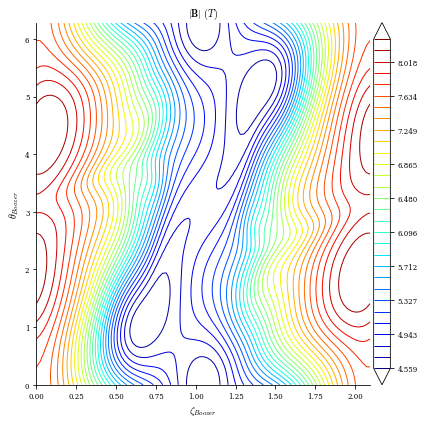

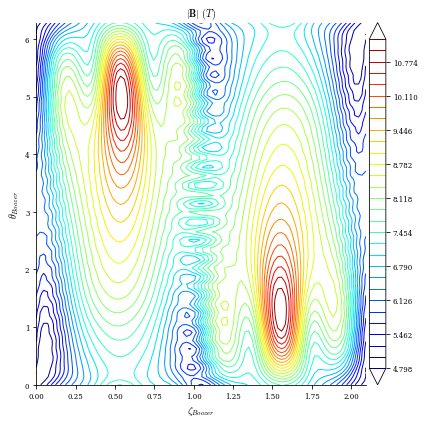

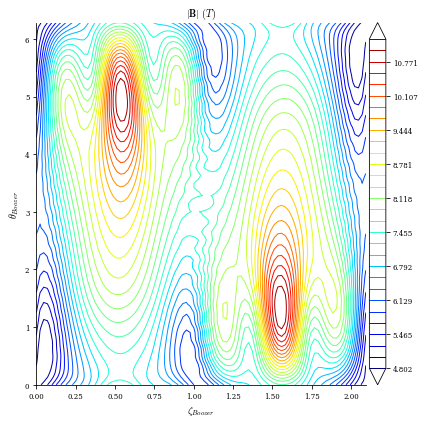

In [3]:
plot_boozer_surface(eq_fixed)
plot_boozer_surface(eq_free_noK)
plot_boozer_surface(eq_free_K)


(<Figure size 864x720 with 6 Axes>,
 array([<Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.000$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.167$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.333$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.500$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.667$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.833$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>],
       dtype=object))

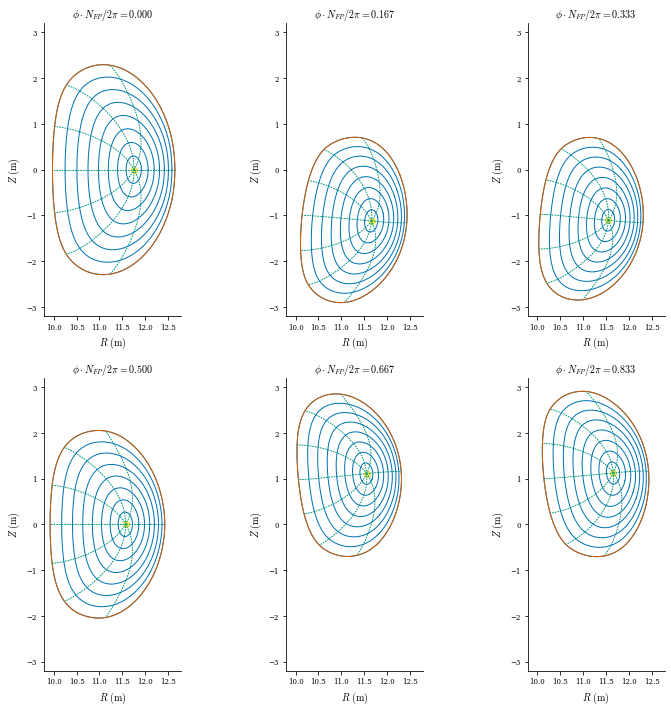

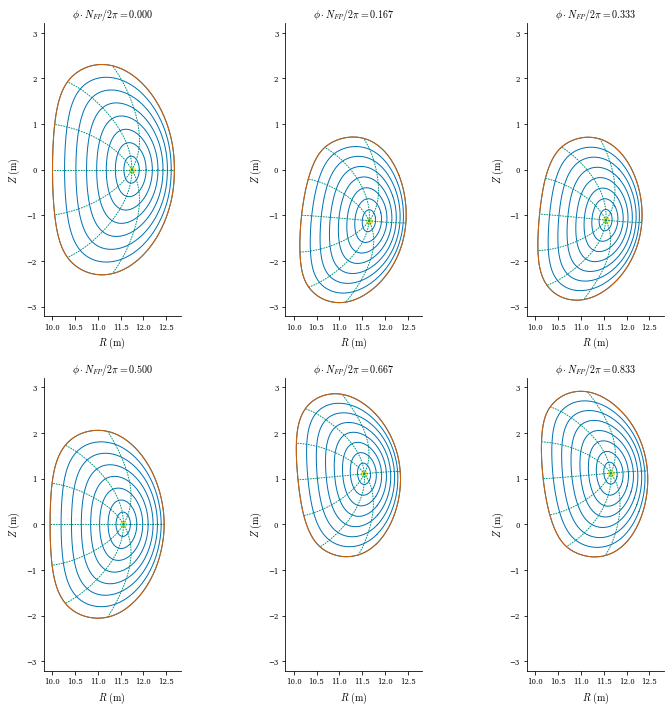

In [4]:
# plot_surfaces(eq_fixed)
plot_surfaces(eq_free_noK)
plot_surfaces(eq_free_K)


# check coils

In [5]:
from desc.coils import CoilSet
base_dirname = "."
ext_field = CoilSet.from_makegrid_coilfile(
    base_dirname + "/coils/coils.biot_savart_opt_nfp3.txt",
)


In [6]:

ext_field_four = ext_field.to_FourierXYZ(N=40)
ext_field_four2 = ext_field.to_FourierXYZ(N=100)

In [7]:
coords=eq_fixed.surface.compute("x",basis="rpz")["x"]
B1 = ext_field.compute_magnetic_field(coords)
B2 = ext_field_four.compute_magnetic_field(coords)


In [8]:
import numpy as np
np.testing.assert_allclose(B1,B2)

AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0

Mismatched elements: 7759 / 7803 (99.4%)
Max absolute difference among violations: 0.00078087
Max relative difference among violations: 1.125
 ACTUAL: array([[-6.938894e-18, -4.538852e+00,  1.877613e+00],
       [ 8.272155e-02, -4.522071e+00,  1.871919e+00],
       [ 1.660797e-01, -4.472990e+00,  1.851594e+00],...
 DESIRED: array([[ 5.551115e-17, -4.538909e+00,  1.877601e+00],
       [ 8.271924e-02, -4.522128e+00,  1.871909e+00],
       [ 1.660755e-01, -4.473050e+00,  1.851588e+00],...

In [ ]:
eq_fixed.surface

In [ ]:
eq_free_noK.surface

(<Figure size 432x432 with 2 Axes>,
 <Axes: title={'center': '$|\\mathbf{B}|~(T)$'}, xlabel='$\\zeta$', ylabel='$\\theta$'>)

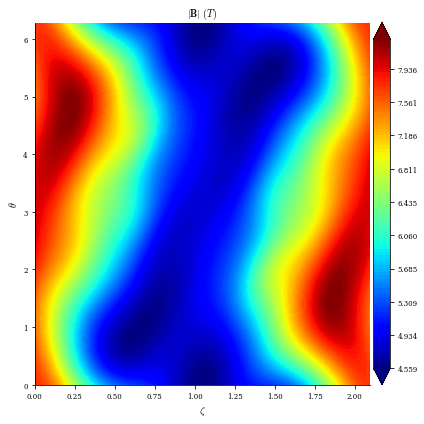

In [12]:
plot_2d(eq_fixed,"|B|")


(<Figure size 432x432 with 2 Axes>,
 <Axes: title={'center': '$\\mathbf{B} \\cdot \\hat{n} ~(\\mathrm{T})$'}, xlabel='$\\zeta$', ylabel='$\\theta$'>)

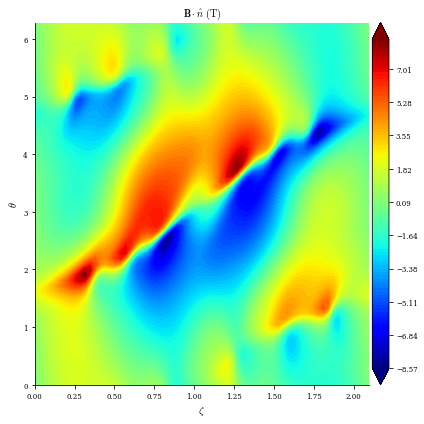

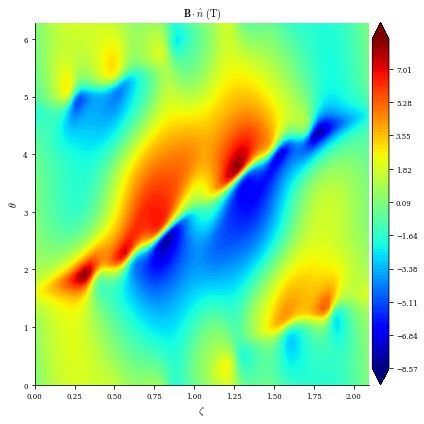

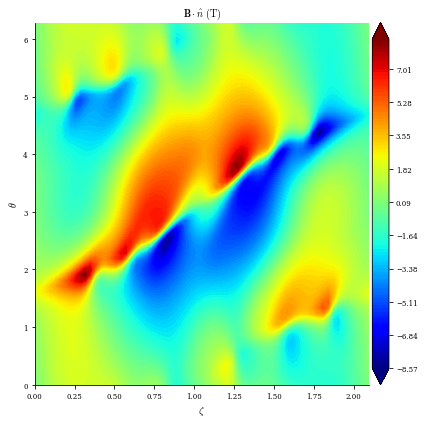

In [11]:
from desc.coils import CoilSet
from desc.plotting import plot_2d

plot_2d(eq_fixed,"B*n",field=ext_field)
plot_2d(eq_fixed,"B*n",field=ext_field_four)
plot_2d(eq_fixed,"B*n",field=ext_field_four2)


